In [24]:
from platform import python_version
print(f'Jupyter Notebook on Mac OS\nPython Version: {python_version()}')

Jupyter Notebook on Mac OS
Python Version: 3.10.8


# D212 - Data Mining II - Clustering Techniques

In [25]:
## Import libraries/packages
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, warnings
sns.set_palette('colorblind')
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.max_open_warning'] = False
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Data Preparation
---

In [26]:
df = pd.read_csv('data/telco_churn_data.csv')
df_cp = df.copy()
df_cp

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,None,Yes,22.77,No,No,None,...,34.341737,-116.539416,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,34.667815,-117.536183,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,...,34.559882,-115.637164,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,None,No,0.00,No,Yes,DSL,...,34.167800,-116.864330,301,0,2793,NaN,NaN,0,0,NaN


In [27]:
## Isolate churn and continuous variables
keep = []
for col in df.columns:
    if df[col].dtype == float:
        keep.append(col)
df = df[keep]

In [28]:
## Drop location columns
df.drop(['Latitude', 'Longitude',], axis=1, inplace=True)

In [29]:
## Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df = scaled_df.dropna()

In [30]:
## Store cleaned data
df.to_csv('clean_dataset.csv')

## Data Analysis
---

In [31]:
## Determine the best value for k
inertia = np.array([])
k_vals = range(1,11)

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_df)
    inertia = np.append(inertia, kmeans.inertia_)

inertia_vals = pd.DataFrame(inertia, index=k_vals, columns=['Inertia'])

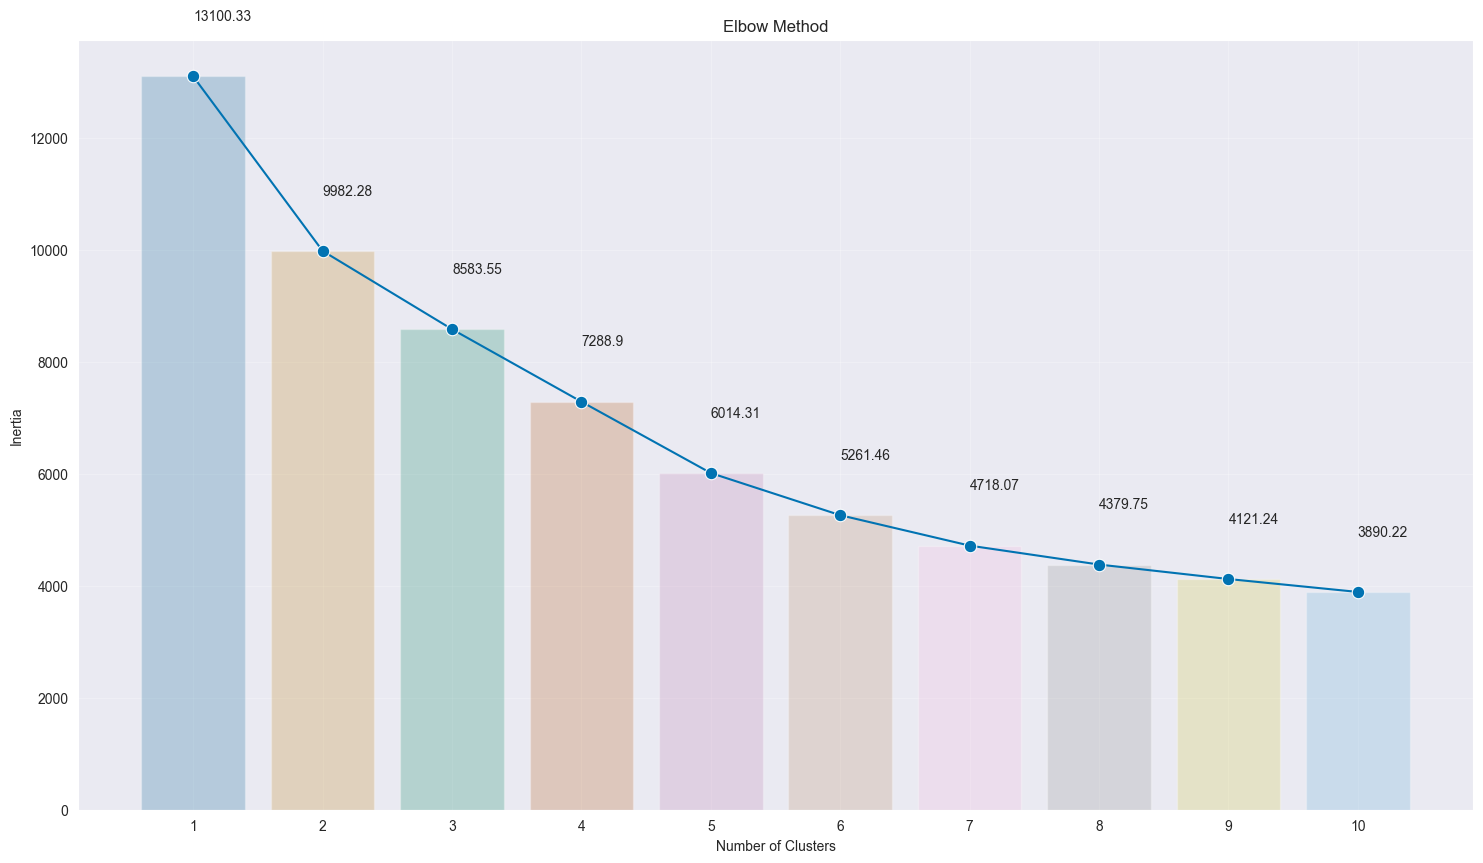

In [32]:
## Plot the inertia values
sns.barplot(x=inertia_vals.index, y=inertia_vals.Inertia, alpha=0.25)
sns.lineplot(x=inertia_vals.index-1, y=inertia_vals.Inertia, marker='o', markersize=9, legend=False)
plt.title('Elbow Method')
plt.xticks(inertia_vals.index-1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
for i in inertia_vals.index:
    plt.text(
        x=i-1, 
        y=inertia_vals.Inertia[i]+1000, 
        s=round(inertia_vals.Inertia[i], 2)
    )
plt.grid(alpha=0.25)

In [33]:
## Perform kmeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(scaled_df)

KMeans(n_clusters=2, random_state=10)

In [34]:
## Get the predicted labels
predicted_labels = kmeans.fit_predict(scaled_df)
## Calculate the silhouette score
silhouette = silhouette_score(scaled_df, predicted_labels)
print(f'Silhouette Score: {silhouette}, {n_clusters} clusters')

Silhouette Score: 0.2932568987754012, 2 clusters


In [35]:
## Assign cluster labels
df.dropna(subset=['Customer Satisfaction'], inplace=True)
df['Cluster'] = kmeans.labels_ + 1

In [36]:
## Calculate cluster summary
cluster_summary = df.groupby('Cluster').agg(['mean', 'median', 'std']).transpose()
cluster_summary.columns = ['Cluster 1', 'Cluster 2']
cluster_summary

Cluster 1    Cluster 2
Avg Monthly Long Distance Charges mean      29.467486    20.501980
                                  median    31.270000    19.090000
                                  std       13.701463    15.302624
Monthly Charge                    mean      91.690603    57.990647
                                  median    94.796000    58.400000
                                  std       17.722581    28.045780
Total Regular Charges             mean    5127.370058  1057.449231
                                  median  5017.900000   740.000000
                                  std     1664.771502  1064.534678
Total Refunds                     mean       2.588618     1.893648
                                  median     0.000000     0.000000
                                  std        8.809694     7.788948
Total Extra Data Charges          mean     869.336718    93.999703
                                  median   355.050000     0.000000
                                  std     1210.614798   231.788635
Total Long Distance Charges       mean    1623.414242   357.428911
                                  median  1573.200000   161.100000
                                  std      845.728042   474.962500
Customer Satisfaction             mean       3.224568     2.918507
                                  median     3.000000     3.000000
                                  std        1.065838     1.315445

In [37]:
## Get centroids
print('test')
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), 
    index=['Cluster 1', 'Cluster 2'], 
    columns=df.columns[:-1]
)

test


In [38]:
## View centroids
print('Cluster centroids:\n')
for i in centroids.index:
    print(i)
    for col in centroids.columns:
        print(f'{col}: {round(centroids[col][i], 2)}')
    print()

Cluster centroids:

Cluster 1
Avg Monthly Long Distance Charges: 29.47
Monthly Charge: 91.69
Total Regular Charges: 5127.37
Total Refunds: 2.59
Total Extra Data Charges: 869.34
Total Long Distance Charges: 1623.41
Customer Satisfaction: 3.22

Cluster 2
Avg Monthly Long Distance Charges: 20.5
Monthly Charge: 57.99
Total Regular Charges: 1057.45
Total Refunds: 1.89
Total Extra Data Charges: 94.0
Total Long Distance Charges: 357.43
Customer Satisfaction: 2.92


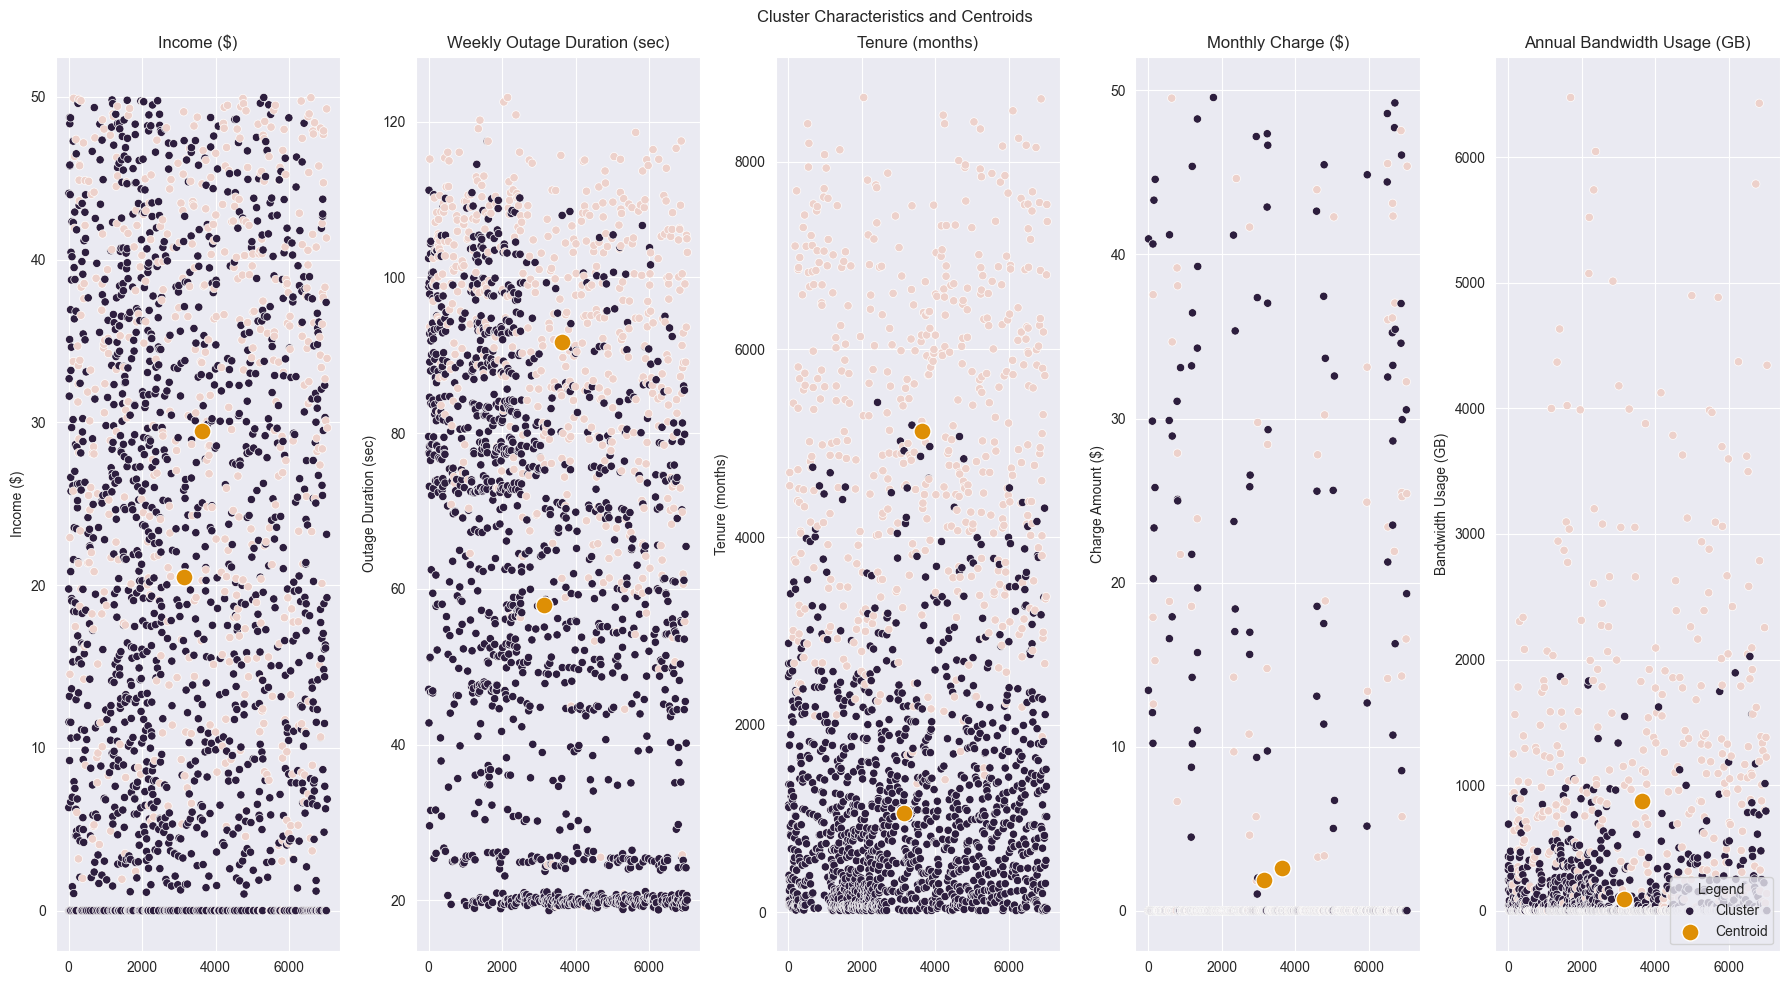

In [39]:
## Plot centroids
centr_x = [sum(df[df.Cluster==1].index)/len(df[df.Cluster==1]), sum(df[df.Cluster==2].index)/len(df[df.Cluster==2])]
titles = [
    'Income ($)', 
    'Weekly Outage Duration (sec)', 
    'Tenure (months)', 
    'Monthly Charge ($)', 
    'Annual Bandwidth Usage (GB)'
]
y_labels = [
    'Income ($)', 
    'Outage Duration (sec)', 
    'Tenure (months)', 
    'Charge Amount ($)', 
    'Bandwidth Usage (GB)'
]
fig,ax = plt.subplots(1,5)
plt.suptitle('Cluster Characteristics and Centroids')
for i in range(5):
    sns.scatterplot(x=df.index, y=df[df.columns[i]], hue=df.Cluster, ax=ax[i], legend=False)
    sns.scatterplot(x=centr_x, y=centroids[centroids.columns[i]], s=150, ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel(y_labels[i])
ax[4].legend(['Cluster', 'Centroid'], title='Legend', loc='lower right')
plt.tight_layout()

In [40]:
df

,Avg Monthly Long Distance Charges,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Satisfaction,Cluster
3,19.76,102.440,2514.50,13.43,327.0,494.00,2.0,2
4,6.33,79.560,2868.15,0.00,430.0,234.21,2.0,2
7,0.00,47.112,2651.20,40.95,689.0,0.00,1.0,2
8,44.07,77.428,1145.70,0.00,241.0,661.05,2.0,2
10,11.59,98.800,1120.30,0.00,358.0,127.49,1.0,2
...,...,...,...,...,...,...,...,...
7018,49.26,105.400,6794.75,32.24,1223.0,3152.64,3.0,1
7026,19.23,20.650,1020.75,19.32,0.0,980.73,3.0,2
7029,33.93,104.950,7544.30,25.42,135.8,2442.96,5.0,1
7034,6.85,20.050,39.25,0.00,0.0,13.70,3.0,2
